In [ ]:
import numpy as np
from keras.utils import to_categorical
from sklearn.feature_extraction.text import TfidfVectorizer
import os
import json
import random
from keras.models import Sequential
from keras import layers
from keras.layers import Dense, Dropout, Activation, Flatten
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from keras.regularizers import l2, l1, l1_l2
%matplotlib inline

In [ ]:
!unzip category_preprocess.zip

Archive:  category_preprocess.zip
   creating: category_preprocess/
  inflating: category_preprocess/nhi.json  
  inflating: category_preprocess/liên khoa mắt tai mũi họng răng hàm mặt da liễu.json  
  inflating: category_preprocess/ngoại.json  
  inflating: category_preprocess/sản.json  
  inflating: category_preprocess/lâm sàng cận lâm sàng.json  
  inflating: category_preprocess/nội.json  
  inflating: category_preprocess/truyền nhiễm.json  


In [ ]:
labels = {
    'lâm sàng cận lâm sàng': 0,
    'liên khoa mắt tai mũi họng răng hàm mặt da liễu': 1,
    'ngoại': 2,
    'nhi': 3,
    'nội': 4,
    'sản': 5,
    'truyền nhiễm': 6
}

In [ ]:
dir_name = 'category_preprocess'

In [ ]:
filenames = []
for (dirpath, dirnames, filenames1) in os.walk(dir_name):
    for fp in filenames1:
        filenames.append(f'{dir_name}/{fp}')

In [ ]:
filenames

['category_preprocess/sản.json',
 'category_preprocess/truyền nhiễm.json',
 'category_preprocess/lâm sàng cận lâm sàng.json',
 'category_preprocess/liên khoa mắt tai mũi họng răng hàm mặt da liễu.json',
 'category_preprocess/nhi.json',
 'category_preprocess/ngoại.json',
 'category_preprocess/nội.json']

In [ ]:
for fpath in filenames:
    with open(fpath, 'r') as fp:
        data = json.load(fp)

        print(fpath, len(data))

category_preprocess/sản.json 7769
category_preprocess/truyền nhiễm.json 2118
category_preprocess/lâm sàng cận lâm sàng.json 1976
category_preprocess/liên khoa mắt tai mũi họng răng hàm mặt da liễu.json 2121
category_preprocess/nhi.json 1676
category_preprocess/ngoại.json 1839
category_preprocess/nội.json 3277


In [ ]:
TARGET_TRAIN_LEN = 3000
TRAIN_MIN_MAX = {
    0: [1800, 1976],
    1: [2000, 2121],
    2: [1700, 1839],
    3: [1600, 1676],
    4: [3000, 3277],
    5: [3000, 4277],
    6: [2000, 2118]
}

In [ ]:
train_text = []
train_label = []
test_text = []
test_label = []

for fpath in filenames:
    label = labels[fpath.split('/')[-1].split('.')[0]]
    print(fpath, label)

    with open(fpath, 'r') as fp:
        data = json.load(fp)
        random.shuffle(data)

        count = 0
        for obj in data:
            count += 1
            # if count > TRAIN_MIN_MAX[label][1]:
            #     break
            if count <= TRAIN_MIN_MAX[label][0]:
                train_label.append(label)
                # ghép title và question 
                train_text.append(obj['title'] + ' ' + obj['question'])
            else:
                test_label.append(label)
                test_text.append(obj['title'] + ' ' + obj['question'])
            if (label != 5 or label != 4) and count <= TARGET_TRAIN_LEN - TRAIN_MIN_MAX[label][0]:
                train_label.append(label)
                obj1 = data[random.randrange(0, TRAIN_MIN_MAX[label][0])]
                obj2 = data[random.randrange(0, TRAIN_MIN_MAX[label][0])]
                train_text.append(obj2['title'] + ' ' + obj2['question'] +
                                  ' ' + obj1['title'] + ' ' + obj1['question'])

category_preprocess/sản.json 5
category_preprocess/truyền nhiễm.json 6
category_preprocess/lâm sàng cận lâm sàng.json 0
category_preprocess/liên khoa mắt tai mũi họng răng hàm mặt da liễu.json 1
category_preprocess/nhi.json 3
category_preprocess/ngoại.json 2
category_preprocess/nội.json 4


In [ ]:
print(train_text[0], train_label[0])

mang thai để_ý tháng nay kinh_nguyệt đều đều vào ngày dương_lịch hàng tháng tính_từ ngày bắt_đầu kinh_nguyệt đến ngày tứ thử que rụng trứng chỉ dấu_hiệu báo chưa rụng sao 5


In [ ]:
print(labels)
print(len(train_text), len(train_label), max(train_label))
print(len(test_text), len(test_label), max(test_label))

{'lâm sàng cận lâm sàng': 0, 'liên khoa mắt tai mũi họng răng hàm mặt da liễu': 1, 'ngoại': 2, 'nhi': 3, 'nội': 4, 'sản': 5, 'truyền nhiễm': 6}
21000 21000 6
5676 5676 6


In [ ]:
with open('text_vectorize.json', 'w', encoding='utf8') as fp:
  json_object = json.dumps((train_text), indent = 4, ensure_ascii=False)
  fp.write(json_object)

In [ ]:
word_vectorizer = TfidfVectorizer(max_features=20000)
word_vectorizer.fit(tfidf_texts)

x_train = word_vectorizer.transform(train_text)
x_test = word_vectorizer.transform(test_text)

print(type(x_train)) # <class 'scipy.sparse.csr.csr_matrix'>
x_train = x_train.toarray()
x_test = x_test.toarray()
print(type(x_train)) # <class 'numpy.ndarray'>
print(x_train.shape, x_test.shape)

<class 'scipy.sparse.csr.csr_matrix'>
<class 'numpy.ndarray'>
(21000, 16331) (5676, 16331)


In [ ]:
y_train = to_categorical(train_label)
y_test = to_categorical(test_label)
print(y_train.shape, y_test.shape)

(21000, 7) (5676, 7)


In [ ]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)
print(np.unique(train_label, return_counts=True))
np.unique(test_label, return_counts=True)

(21000, 16331) (5676, 16331)
(21000, 7) (5676, 7)
(array([0, 1, 2, 3, 4, 5, 6]), array([3000, 3000, 3000, 3000, 3000, 3000, 3000]))


(array([0, 1, 2, 3, 4, 5, 6]),
 array([ 176,  121,  139,   76,  277, 4769,  118]))

In [ ]:
def build_model_regularizer(feature_num, label_num):
    print(feature_num, label_num)
    model = Sequential()
    # Input - Layer
    model.add(layers.Input(feature_num,))
    model.add(layers.Dense(1024, activation = "relu",kernel_regularizer=l2(0.0001)))
    # Hidden - Layers
    model.add(layers.Dropout(0.8, noise_shape=None, seed=None))
    # model.add(layers.Dense(512, activation = "relu", kernel_regularizer=l2(0.005), bias_regularizer=l2(0.005)))
    # model.add(layers.Dropout(0.8, noise_shape=None, seed=None))
    model.add(layers.Dense(256, activation = "relu",
                           kernel_regularizer=l2(0.0025)))
    model.add(layers.Dropout(0.6, noise_shape=None, seed=None))
    model.add(layers.Dense(32, activation = "relu",
                           kernel_regularizer=l2(0.0025)))
    model.add(layers.Dropout(0.4, noise_shape=None, seed=None))
    model.add(layers.Dense(16, activation = "relu"))
    # Output- Layer
    model.add(Dense(label_num, activation='softmax'))
    model.compile(optimizer = "adam", loss = "categorical_crossentropy",metrics = ["accuracy"])
    return model

In [ ]:
mymodel = build_model_regularizer(x_train.shape[1], y_train.shape[1])
mymodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              15950848  
_________________________________________________________________
dropout (Dropout)            (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                16416     
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 16)                5

In [ ]:
history = mymodel.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=40, batch_size=32)

In [ ]:
print(history.history)

{'loss': [1.7254222631454468, 1.4257522821426392, 1.3531931638717651, 1.3123018741607666, 1.285187005996704, 1.2514296770095825, 1.2383445501327515, 1.2265673875808716, 1.200355887413025, 1.191537618637085, 1.1764121055603027, 1.1766852140426636, 1.162326693534851, 1.1480756998062134, 1.144690752029419, 1.1421871185302734, 1.1246676445007324, 1.1316888332366943, 1.1183007955551147, 1.124900460243225, 1.1189393997192383, 1.1220908164978027, 1.119411826133728, 1.1201292276382446, 1.106142520904541, 1.1122881174087524, 1.1004084348678589, 1.100053071975708, 1.1035252809524536, 1.0976183414459229, 1.1008559465408325, 1.1091275215148926, 1.0991895198822021, 1.1018792390823364, 1.093274474143982, 1.0909608602523804, 1.0872482061386108, 1.0839135646820068, 1.0886529684066772, 1.0812745094299316], 'accuracy': [0.44247618317604065, 0.6538095474243164, 0.7065714001655579, 0.7422381043434143, 0.7576666474342346, 0.7770476341247559, 0.7876190543174744, 0.7971428632736206, 0.8036190271377563, 0.810

In [ ]:
mymodel.save('model.h5')

In [ ]:
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

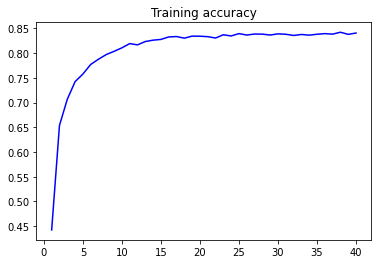

In [ ]:
plt.plot(epochs, acc, 'b', label='Training acc')
plt.title('Training accuracy')
plt.savefig('training_acc.png')

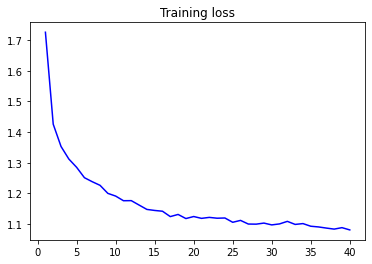

In [ ]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.title('Training loss')
plt.savefig('training_loss.png')

In [ ]:
from keras.models import load_model

In [ ]:
mymodel = load_model('./model.h5')

In [ ]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, confusion_matrix

In [ ]:
# Evaluate tren tap test
_, validate_acc = mymodel.evaluate(x_test, y_test, verbose=0)
y_pred = mymodel.predict(x_test, batch_size=64, verbose=1)
y_pred_bool = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print('Accuracy trên tập test: %s%%' % str(validate_acc * 100) )

print(classification_report(y_true, y_pred_bool))

89/89 [==============================] - 0s 3ms/step
Accuracy trên tập test: 86.80408596992493%
              precision    recall  f1-score   support

           0       0.58      0.90      0.70       176
           1       0.82      0.92      0.86       121
           2       0.65      0.81      0.72       139
           3       0.70      0.97      0.82        76
           4       0.38      0.85      0.53       277
           5       0.99      0.86      0.92      4769
           6       0.52      0.94      0.67       118

    accuracy                           0.87      5676
   macro avg       0.66      0.89      0.75      5676
weighted avg       0.92      0.87      0.89      5676



In [ ]:
cm = confusion_matrix(y_true, y_pred_bool)

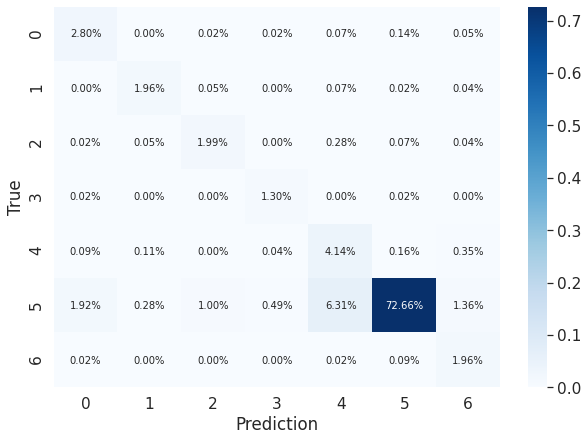

In [ ]:
# df_cm = pd.DataFrame(cm, range(7), range(7))
plt.figure(figsize=(10,7))
sn.set(font_scale=1.4, font='bold') # for label size
sn.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', cmap='Blues', annot_kws={"size": 10}) # font size
plt.ylabel('True')
plt.xlabel('Prediction')
# plt.show()
plt.savefig('cm.png')